Винников Степан
ИУ5-62Б
РК№1 Вариант 9

In [ ]:
# Импорт библиотек

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline

import numpy as np

In [33]:
# Загрузка данных
data = pd.read_csv("fifa.csv", sep=",")
data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [34]:
# Переименование полей в стиле SQL
data = data.rename(columns={
    "Club Logo": "club_logo",
    "Preferred Foot": "preferred_foot",
    "International Reputation": "international_reputation",
    "Weak Foot": "weak_foot",
    "Skill Moves": "skill_moves",
    "Work Rate": "work_rate",
    "Body Type": "body_type",
    "Real Face": "real_face",
    "Jersey Number": "jersey_number",
    "Loaned From": "loaned_from",
    "Contract Valid Until": "contract_valid_until",
    "Release Clause": "release_clause",
})

In [35]:
data.describe()

,ID,Age,Overall,Potential,Special,international_reputation,weak_foot,skill_moves,jersey_number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [36]:
data.shape

(18207, 88)

In [37]:
data.dtypes

ID                  int64
Name               object
Age                 int64
Photo              object
Nationality        object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
release_clause     object
Length: 88, dtype: object

In [38]:
# Количество пустых значений
total_count = data.shape[0]
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    temp_perc = round((temp_null_count / total_count) * 100.0, 2)
    print('{} – {}, {}%'.format(col, temp_null_count, temp_perc))

ID – 0, 0.0%
Name – 0, 0.0%
Age – 0, 0.0%
Photo – 0, 0.0%
Nationality – 0, 0.0%
Flag – 0, 0.0%
Overall – 0, 0.0%
Potential – 0, 0.0%
Club – 241, 1.32%
club_logo – 0, 0.0%
Value – 0, 0.0%
Wage – 0, 0.0%
Special – 0, 0.0%
preferred_foot – 48, 0.26%
international_reputation – 48, 0.26%
weak_foot – 48, 0.26%
skill_moves – 48, 0.26%
work_rate – 48, 0.26%
body_type – 48, 0.26%
real_face – 48, 0.26%
Position – 60, 0.33%
jersey_number – 60, 0.33%
Joined – 1553, 8.53%
loaned_from – 16943, 93.06%
contract_valid_until – 289, 1.59%
Height – 48, 0.26%
Weight – 48, 0.26%
LS – 2085, 11.45%
ST – 2085, 11.45%
RS – 2085, 11.45%
LW – 2085, 11.45%
LF – 2085, 11.45%
CF – 2085, 11.45%
RF – 2085, 11.45%
RW – 2085, 11.45%
LAM – 2085, 11.45%
CAM – 2085, 11.45%
RAM – 2085, 11.45%
LM – 2085, 11.45%
LCM – 2085, 11.45%
CM – 2085, 11.45%
RCM – 2085, 11.45%
RM – 2085, 11.45%
LWB – 2085, 11.45%
LDM – 2085, 11.45%
CDM – 2085, 11.45%
RDM – 2085, 11.45%
RWB – 2085, 11.45%
LB – 2085, 11.45%
LCB – 2085, 11.45%
CB – 2085, 

<AxesSubplot:xlabel='Age', ylabel='Overall'>

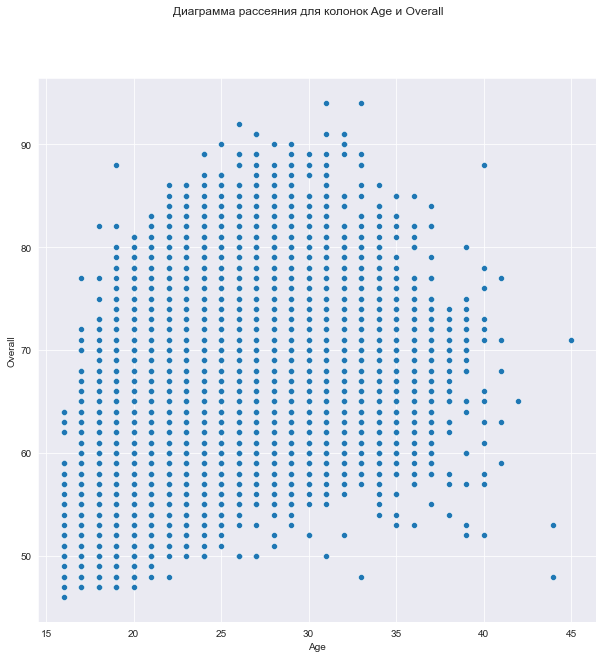

In [39]:
# Диаграмма рассеяния для двух стобцов
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle("Диаграмма рассеяния для колонок Age и Overall")
sns.scatterplot(ax=ax, x='Age', y='Overall', data=data)

In [40]:
# Импутация столбца jersey_number с помощью медианы
temp_col = SimpleImputer(strategy='median').fit_transform(data[['jersey_number']])
data[['JerseyNumber']] = temp_col

In [42]:
# Импутация константой NA столбца LS
temp_col = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA').fit_transform(data[['LS']])
data[['LS']] = temp_col

# Количество пустых значений
total_count = data.shape[0]
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    temp_perc = round((temp_null_count / total_count) * 100.0, 2)
    print('{} – {}, {}%'.format(col, temp_null_count, temp_perc))

ID – 0, 0.0%
Name – 0, 0.0%
Age – 0, 0.0%
Photo – 0, 0.0%
Nationality – 0, 0.0%
Flag – 0, 0.0%
Overall – 0, 0.0%
Potential – 0, 0.0%
Club – 241, 1.32%
club_logo – 0, 0.0%
Value – 0, 0.0%
Wage – 0, 0.0%
Special – 0, 0.0%
preferred_foot – 48, 0.26%
international_reputation – 48, 0.26%
weak_foot – 48, 0.26%
skill_moves – 48, 0.26%
work_rate – 48, 0.26%
body_type – 48, 0.26%
real_face – 48, 0.26%
Position – 60, 0.33%
jersey_number – 60, 0.33%
Joined – 1553, 8.53%
loaned_from – 16943, 93.06%
contract_valid_until – 289, 1.59%
Height – 48, 0.26%
Weight – 48, 0.26%
LS – 0, 0.0%
ST – 2085, 11.45%
RS – 2085, 11.45%
LW – 2085, 11.45%
LF – 2085, 11.45%
CF – 2085, 11.45%
RF – 2085, 11.45%
RW – 2085, 11.45%
LAM – 2085, 11.45%
CAM – 2085, 11.45%
RAM – 2085, 11.45%
LM – 2085, 11.45%
LCM – 2085, 11.45%
CM – 2085, 11.45%
RCM – 2085, 11.45%
RM – 2085, 11.45%
LWB – 2085, 11.45%
LDM – 2085, 11.45%
CDM – 2085, 11.45%
RDM – 2085, 11.45%
RWB – 2085, 11.45%
LB – 2085, 11.45%
LCB – 2085, 11.45%
CB – 2085, 11.45